In [3]:
import pandas as pd
import numpy as np

# membangkitkan data dengan menambahkan beberapa pencilan

np.random.seed(0)
n = 15 # total data 

# Membangkitkan data x1, x2, x3 secara acak dari distribusi normal
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = np.random.normal(0, 1, n)
noise = np.random.normal(0, 1, n)
y = 2 * x1 + 3 * x2 + 4 * x3 + noise

# membuat pencilan pada data
x1[5]=11
x3[11]=9
y[[5,11]]=10,8
df=pd.DataFrame({'y':y,'x1':x1,'x2':x2,'x3':x3})

In [4]:
# menampilkan data bangkitan dengan pencilan
df

,y,x1,x2,x3
0,4.710843,1.764052,0.333674,0.154947
1,5.542406,0.400157,1.494079,0.378163
2,-1.431651,0.978738,-0.205158,-0.887786
3,-4.116094,2.240893,0.313068,-1.980796
4,-0.431560,1.867558,-0.854096,-0.347912
5,10.000000,11.000000,-2.552990,0.156349
6,9.169098,0.950088,0.653619,1.230291
7,6.589308,-0.151357,0.864436,1.202380
8,-5.162872,-0.103219,-0.742165,-0.387327
9,6.393068,0.410599,2.269755,-0.302303


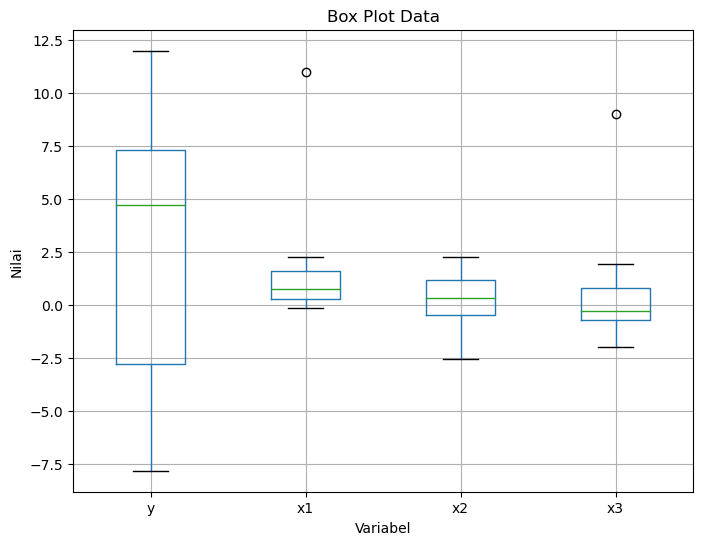

In [5]:
# deteksi awal pencilan dengan menggunakan boxplot

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df.boxplot(column=['y', 'x1', 'x2', 'x3'])
plt.title('Box Plot Data')
plt.xlabel('Variabel')
plt.ylabel('Nilai')
plt.show()

In [41]:
import statsmodels.api as sm
from statsmodels.robust import norms
import math

# regresi linear dengan menggunakan metode ols
X = df[['x1', 'x2', 'x3']]
X = sm.add_constant(X)
model = sm.OLS(df['y'], X)
results = model.fit()
fitted_values = X.dot(results.params)
residual=results.resid

# regresi robust
huber_estimator = sm.RLM(df['y'], X, M=norms.HuberT())
huber_results = huber_estimator.fit()
fitted_values_robust = X.dot(huber_results.params)

# mengecek outlier menggunakan nilai pengaruh(laverage)
# Menghitung nilai leverage (2HIi) dan nilai leverage standar (HIi)
leverage = results.get_influence().hat_matrix_diag
leverage_2hi = (2*(4-1))/len(df)
leverage_hi = leverage

# mengecek outlier menggunkan metode dffits(difference fitted value fits)
# menetapkan kriteria dffits
kriteria=2*(math.sqrt(4/len(df)))
dffits_values = results.get_influence().dffits[0]
influence = results.get_influence()

# Menampilkan hasil
df1=pd.DataFrame()
df1['y']=df['y']
df1['x1']=df['x1']
df1['x2']=df['x2']
df1['x3']=df['x3']
df1['hii'] = leverage_hi
df1['2hii'] = leverage_2hi
df1['keterangan'] = df1['hii'].apply(lambda x: 'bukan pencilan' if x < leverage_2hi else 'pencilan')
df1['dffits']=dffits_values
df1['kriteria']=kriteria
df1['ket_dffits'] = df1['dffits'].apply(lambda x: 'bukan pencilan' if abs(x) < kriteria else 'Pencilan' )


In [42]:
# menampilkan pencilan dengan melihat nilai hii dan nilai dffits
df1

,y,x1,x2,x3,hii,2hii,keterangan,dffits,kriteria,ket_dffits
0,4.710843,1.764052,0.333674,0.154947,0.072214,0.4,bukan pencilan,0.106347,1.032796,bukan pencilan
1,5.542406,0.400157,1.494079,0.378163,0.148934,0.4,bukan pencilan,-0.040081,1.032796,bukan pencilan
2,-1.431651,0.978738,-0.205158,-0.887786,0.106211,0.4,bukan pencilan,-0.000626,1.032796,bukan pencilan
3,-4.116094,2.240893,0.313068,-1.980796,0.149164,0.4,bukan pencilan,-0.904739,1.032796,bukan pencilan
4,-0.431560,1.867558,-0.854096,-0.347912,0.134923,0.4,bukan pencilan,0.162678,1.032796,bukan pencilan
5,10.000000,11.000000,-2.552990,0.156349,0.931845,0.4,pencilan,5.374694,1.032796,Pencilan
6,9.169098,0.950088,0.653619,1.230291,0.080735,0.4,bukan pencilan,0.455773,1.032796,bukan pencilan
7,6.589308,-0.151357,0.864436,1.202380,0.099593,0.4,bukan pencilan,0.346790,1.032796,bukan pencilan
8,-5.162872,-0.103219,-0.742165,-0.387327,0.234618,0.4,bukan pencilan,-0.028447,1.032796,bukan pencilan
9,6.393068,0.410599,2.269755,-0.302303,0.319427,0.4,bukan pencilan,-0.434904,1.032796,bukan pencilan


In [23]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     12.84
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           0.000647
Time:                        18:48:16   Log-Likelihood:                -37.220
No. Observations:                  15   AIC:                             82.44
Df Residuals:                      11   BIC:                             85.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3614      1.157     -1.177      0.2

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [37]:
# menampilkan parameter model regresi dengan metode ols

b0=results.params[0]
b1=results.params[1]
b2=results.params[1]
b3=results.params[3]
print('model regresi yang terbentuk adalah:')
print(f"y={b0}+{b1}X1+{b2}X2+{b3}X3")

model regresi yang terbentuk adalah:
y=-1.3613794600713187+1.8429092790287913X1+1.8429092790287913X2+1.1702950357018018X3


In [31]:
print(huber_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   15
Model:                            RLM   Df Residuals:                       11
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 16 Jul 2023                                         
Time:                        18:53:22                                         
No. Iterations:                    27                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3626      1.242     -1.098      0.2

In [38]:
# menampilkan parameter model regresi robust

b0=huber_results.params[0]
b1=huber_results.params[1]
b2=huber_results.params[1]
b3=huber_results.params[3]
print('model regresi robust yang terbentuk adalah:')
print(f"y={b0}+{b1}X1+{b2}X2+{b3}X3")

model regresi robust yang terbentuk adalah:
y=-1.3626454204284881+1.8751085845423754X1+1.8751085845423754X2+1.0770759024383305X3
